In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM

%matplotlib inline

In [8]:
 df = pd.read_csv('RSCCASN.csv', parse_dates=True, index_col='DATE')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [10]:
df.describe()

,RSCCASN
count,334.000000
mean,16325.095808
std,5369.839014
min,6938.000000
25%,12298.500000
50%,15878.500000
75%,19772.500000
max,34706.000000


In [11]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [13]:
len(df)

334

<AxesSubplot:xlabel='DATE'>

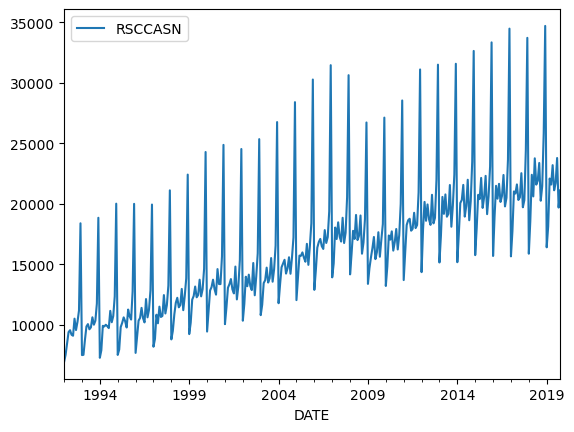

In [12]:
df.plot()

In [14]:
test_size = 18
test_index = len(df) - test_size

In [15]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [16]:
train[:5]

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [17]:
test[:5]

,RSCCASN
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260


In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(train)

MinMaxScaler()

In [21]:
scaled_train = scaler.transform(train)

In [22]:
scaled_test = scaler.transform(test)

In [24]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length=length, batch_size=1)

In [33]:
n_features = 1

In [122]:
model=None

In [142]:
model = Sequential([
    Input((length, n_features)),
    LSTM(100),
    Dense(1)
])

In [143]:
model.compile(optimizer='adam', loss='mse')

In [144]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                       │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [145]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                          length=length, batch_size=1)

In [146]:
model.fit(generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0278 - val_loss: 0.0041
Epoch 2/20
 15/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0297     

C:\Users\Lenovo\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0243 - val_loss: 0.0046
Epoch 3/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0179 - val_loss: 0.0025
Epoch 4/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0176 - val_loss: 0.0026
Epoch 5/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0234 - val_loss: 0.0037
Epoch 6/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0167 - val_loss: 0.0035
Epoch 7/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0155 - val_loss: 0.0060
Epoch 8/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0168 - val_loss: 0.0044
Epoch 9/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0131 - val_loss: 0.0079
Epoch 10/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0105 - val_loss: 0.0052
Epoch 11/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0112 - val_loss: 0.0034
Epoch 12/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0108 - val_loss: 0.0090
Epoch 13/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0

In [147]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

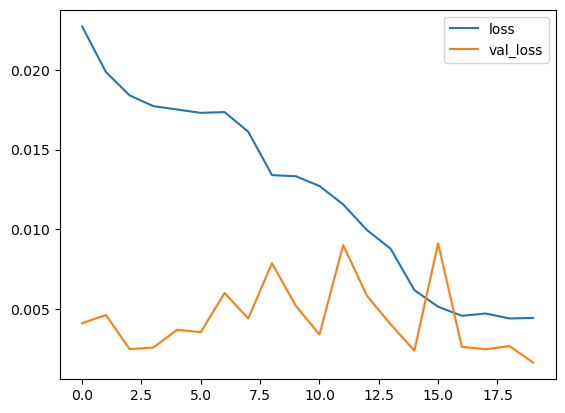

In [148]:
losses.plot()

In [149]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [150]:
test_predictions = scaler.inverse_transform(test_predictions)

In [151]:
test['Predictions'] = test_predictions

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7028\86846539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = test_predictions


In [152]:
test.head(10)

,RSCCASN,Predictions
DATE,,
2018-05-01,23764,20739.323303
2018-06-01,21589,19773.053904
2018-07-01,21919,19993.313592
2018-08-01,23381,20780.250497
2018-09-01,20260,19388.465679
2018-10-01,21473,21100.304800
2018-11-01,25831,26295.328222
2018-12-01,34706,33106.855143
2019-01-01,16410,16764.636710


<AxesSubplot:xlabel='DATE'>

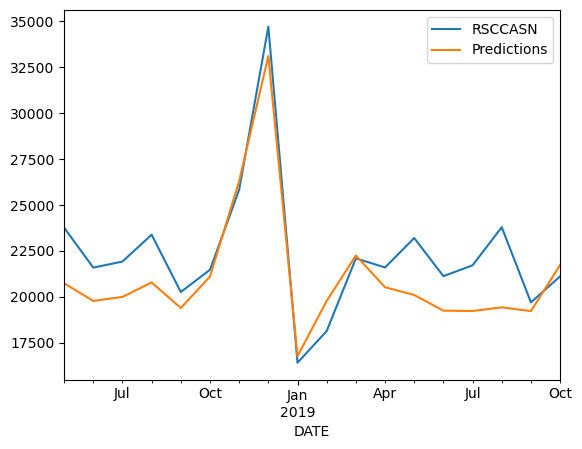

In [153]:
test.plot()

In [155]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df)

In [156]:
length = 12
generator = TimeseriesGenerator(data, data, length=length, batch_size=1)

In [186]:
model = None

In [187]:
model = Sequential([
    Input((length, n_features)),
    LSTM(100, activation='relu'),
    Dense(1)
])

In [188]:
model.compile(optimizer='adam', loss='mse')

In [189]:
model.fit(generator, epochs=15)

Epoch 1/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0437
Epoch 2/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0175
Epoch 3/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0095
Epoch 4/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0035
Epoch 5/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0026
Epoch 6/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0016
Epoch 7/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0021
Epoch 8/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0013
Epoch 9/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0013
Epoch 10/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0018
Epoch 11/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0019
Epoch 12/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.7116e-04
Epoch 13/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0015
Epoch 14/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0010
Epoch 15/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step 

<AxesSubplot:>

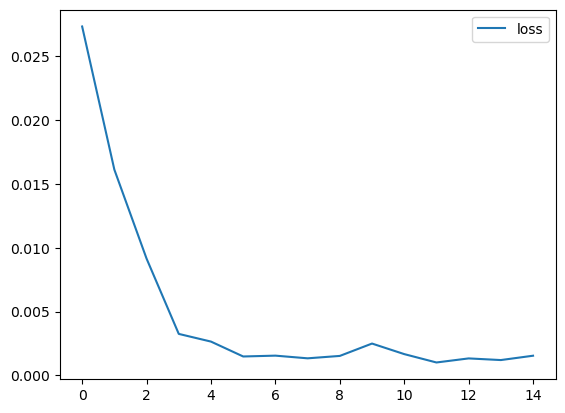

In [190]:
pd.DataFrame(model.history.history).plot()

In [191]:
forecast = []

periods = 12

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [192]:
forecast = scaler.inverse_transform(forecast)

In [193]:
df[-5:]

,RSCCASN
DATE,
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791
2019-09-01,19695
2019-10-01,21113


In [194]:
forecast[:5]

array([[21021.4182477 ],
       [19917.65983748],
       [20142.96635962],
       [21884.43465662],
       [19373.84552956]])

In [195]:
forecast_index = pd.date_range(start='2019-11-01', periods=periods, freq="MS")

In [196]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [197]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

In [198]:
forecast_df.head()

,Forecast
2019-11-01,21021.418248
2019-12-01,19917.659837
2020-01-01,20142.966360
2020-02-01,21884.434657
2020-03-01,19373.845530


<AxesSubplot:xlabel='DATE'>

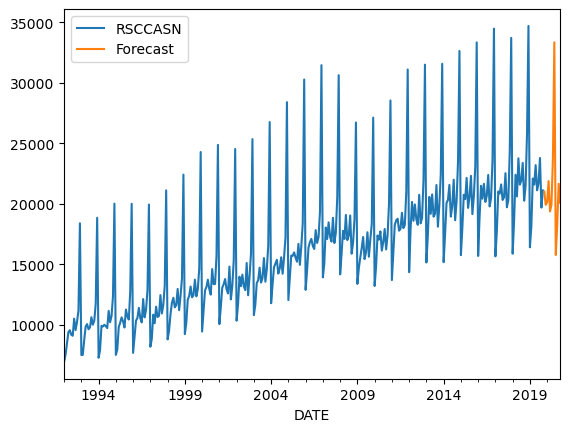

In [199]:
ax = df.plot()
forecast_df.plot(ax=ax)

(576.0, 611.0)

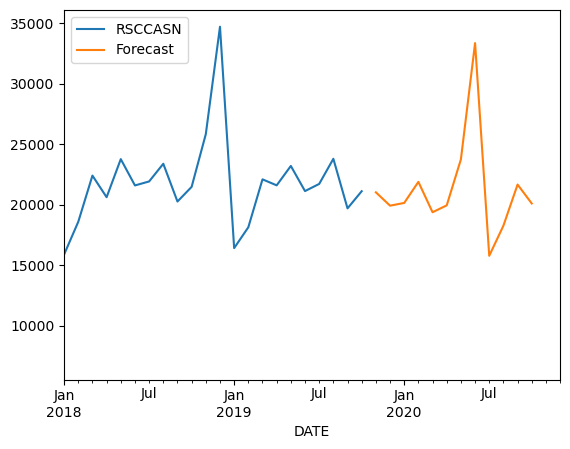

In [200]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01', '2020-12-01')